In [1]:
from JC_functions import *
from polygons_data import *
from JC_momenst import *

In [2]:
SHAPES = [
    ("Triangle", Triangle),
    ("Square", Square),
    ("Pentagon", Pentagon),
    ("Hexagon", Hexagon),
    ("Heptagon", Heptagon),
    ("Octagon", Octagon),
    ("Nonagon", Nonagon),
    ("Circle", Circle),
    ("Star", Star),
]



In [3]:
polygons, labels = GenerateShapeArray(
    samples_per_class=50, points_per_shape=100, perturbation_strength=0.02
)

C:\Users\LONGA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\LONGA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_mds.py:744: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9. To suppress this warning, provide some value of `n_init`.
  warnings.warn(
C:\Users\LONGA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_mds.py:754: FutureWarning: The default value of `init` will change from 'random' to 'classical_mds' in 1.10. To suppress this warning, provide some value of `init`.
  warnings.warn(


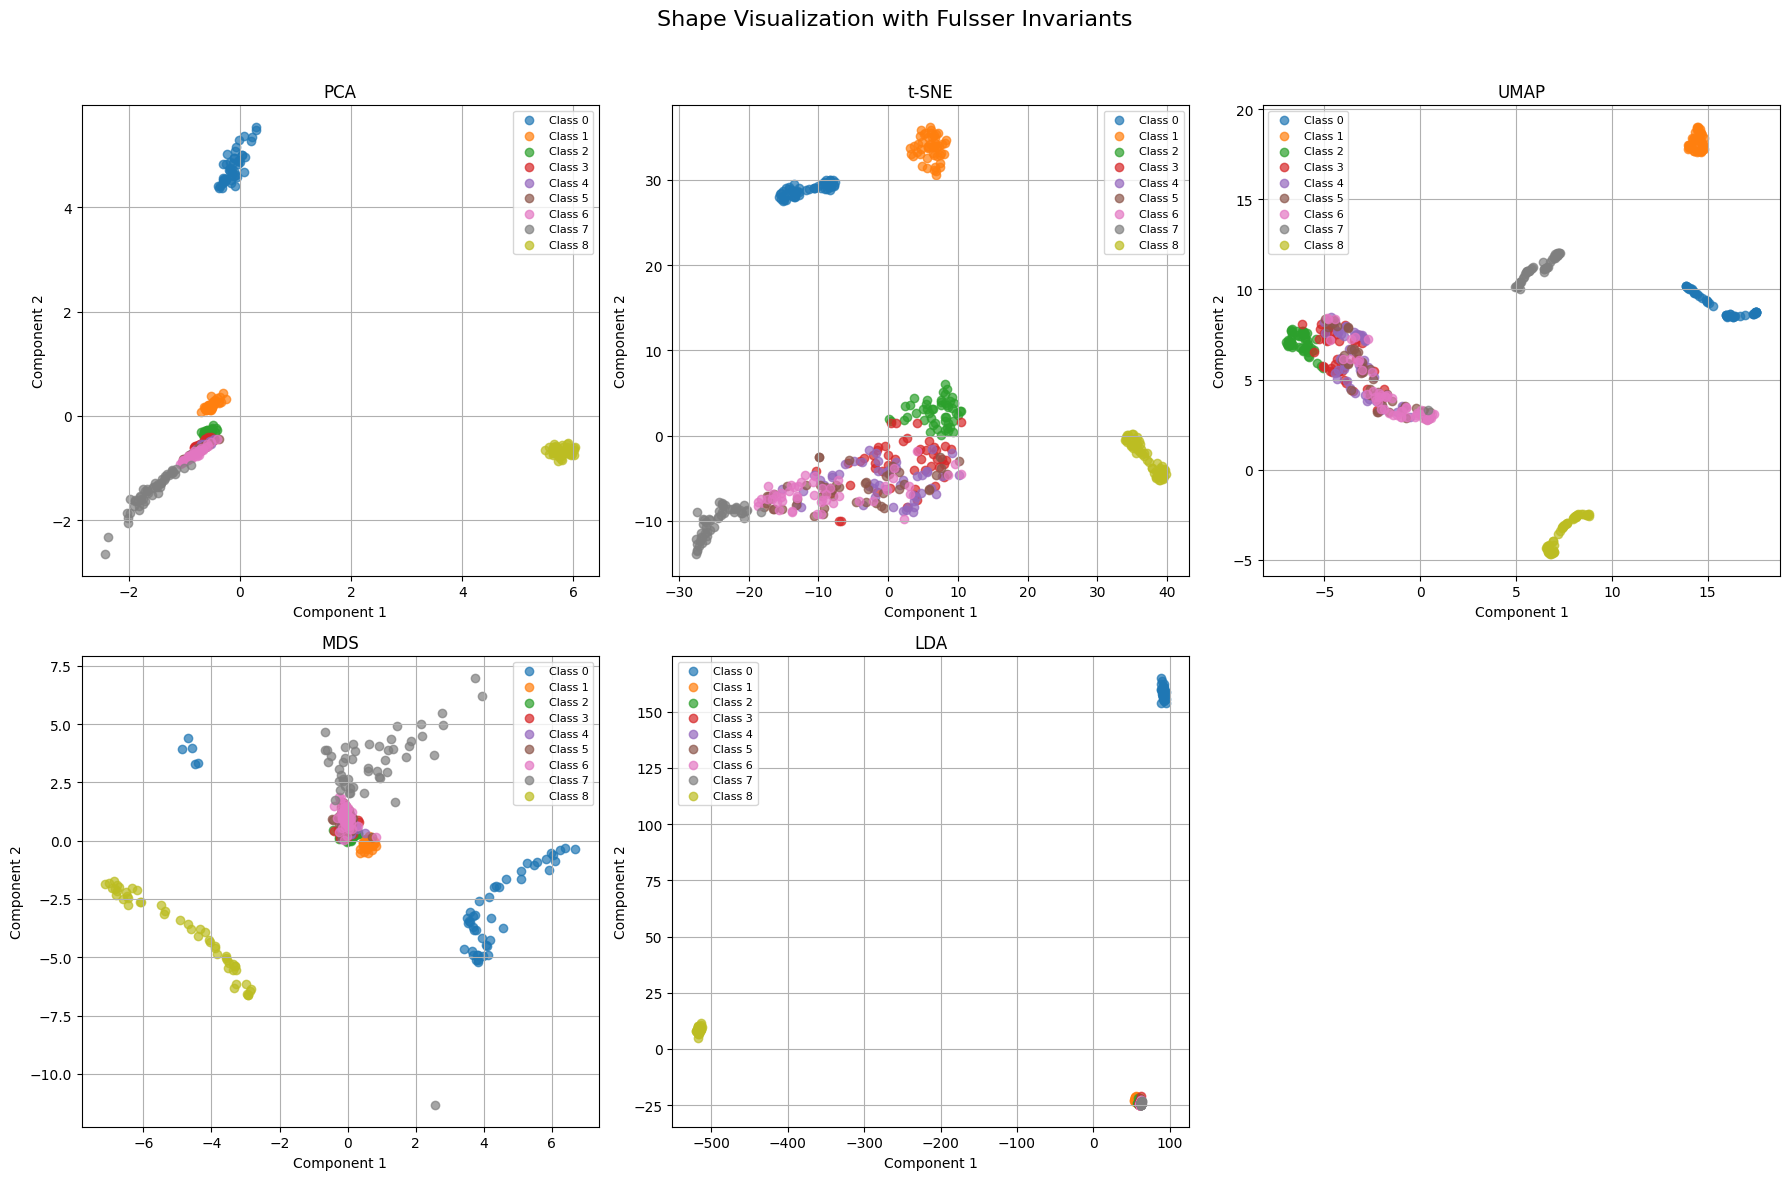

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from umap import UMAP





feature_dicts = [features_13(poly) for poly in polygons]

feature_names = list(feature_dicts[0].keys())
X = np.array([
    [fd[name].real if np.iscomplexobj(fd[name]) else fd[name] for name in feature_names]
    for fd in feature_dicts
], dtype=float)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

methods = {
    "PCA": PCA(n_components=2),
    "t-SNE": TSNE(n_components=2, random_state=42, perplexity=30),
    "UMAP": UMAP(n_components=2, random_state=42),
    "MDS": MDS(n_components=2, random_state=42),
#    "Isomap": Isomap(n_components=2),
}

if len(set(labels)) > 1:
    methods["LDA"] = LDA(n_components=2)

plt.figure(figsize=(18, 12))

n_clusters = len(np.unique(labels))

for i, (name, model) in enumerate(methods.items(), 1):
    plt.subplot(2, 3, i)

    if name == "LDA":
        X_2d = model.fit_transform(X_scaled, labels)
    else:
        X_2d = model.fit_transform(X_scaled)

    for label_id in range(n_clusters):
        idx = labels == label_id
        plt.scatter(X_2d[idx, 0], X_2d[idx, 1], alpha=0.7, label=f"Class {label_id}")

    plt.title(name)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.grid(True)
    plt.legend(loc="best", fontsize=8)

plt.suptitle("Shape Visualization with Fulsser Invariants", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


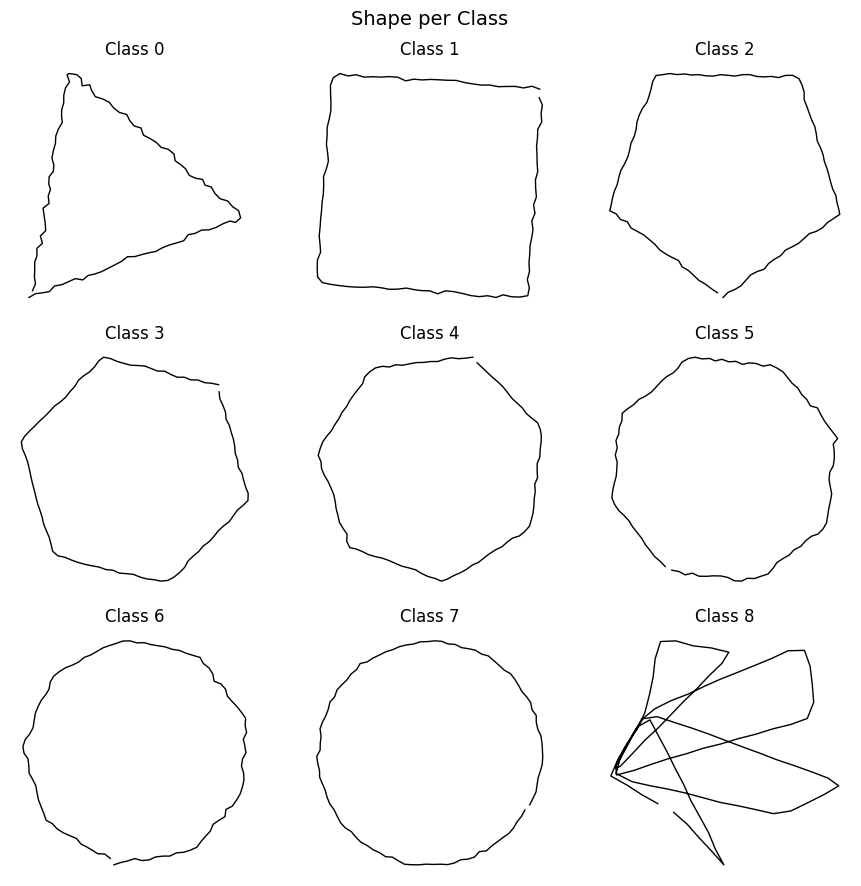

In [5]:
selected = one_polygon_per_class(polygons, labels)
n_classes = len(selected)

fig, axes = plt.subplots(3, 3, figsize=(9, 9))
axes = axes.flatten()

for ax, (lab, poly) in zip(axes, sorted(selected.items())):
    xs = [z.real for z in poly]
    ys = [z.imag for z in poly]

    ax.plot(xs, ys, "-k", linewidth=1)
    ax.set_title(f"Class {lab}")
    ax.set_aspect("equal")
    ax.axis("off")

plt.suptitle("Shape per Class", fontsize=14)
plt.tight_layout()
plt.show()